**Importing libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Read csv**

In [2]:
uber = pd.read_csv("Uber_Request_Data.csv", encoding = "ISO-8859-1")
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


**Correcting Data types**

In [3]:
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'])
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


**Remove unnecessary column**

In [0]:
uber=uber.drop(['Driver id'], axis=1)

In [5]:
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [6]:
uber.shape

(6745, 5)

In [7]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


**CHECK UNIQUE DATAPOINTS**

In [8]:
print(uber['Pickup point'].unique())


['Airport' 'City']


**CHECK IF ANY NULL VALUE IS THERE OR NOT**

In [9]:
uber.isnull().sum(axis=0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
uber[(uber['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

rows are empty when the Status is No Cars Available or Cancelled. Since the trips did not happen in those cases, the Drop timestamp can not be available, hence the null values here are valid.

In [11]:
print(len(uber['Status'].unique()))

3


In [12]:
print(uber['Status'].unique())

['Trip Completed' 'Cancelled' 'No Cars Available']


**CHECK IF ANAY DUPLICATE VALUES ARE THERE OR NOT**

In [13]:
len(uber[uber.duplicated()].index)

0

## **Univariate Analysis**

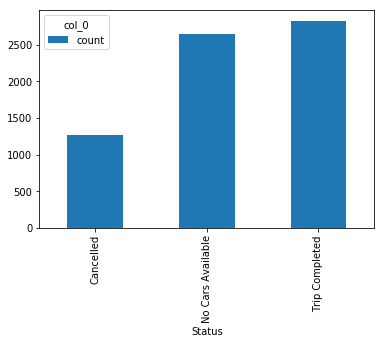

In [14]:
status = pd.crosstab(index=uber["Status"], columns="count")
status.plot.bar()

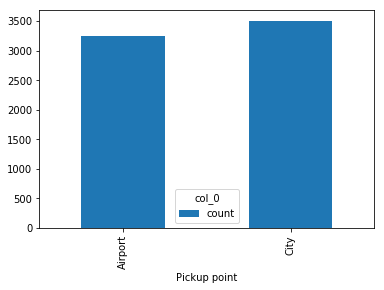

In [15]:
pickup=pd.crosstab(index=uber['Pickup point'],columns="count")
pickup.plot.bar()

pickup points from City is slightly more

## ***Bivariate Analysis***

In [16]:
uber.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

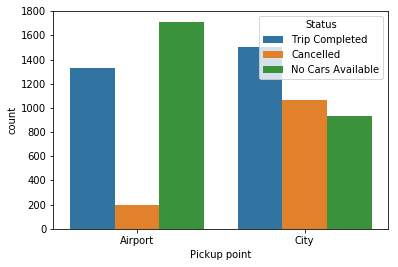

In [17]:
sns.countplot(x=uber['Pickup point'], hue=uber['Status'], data=uber)

There are more "No cars available" from Airport to City and more cars "Cancelled" from City to Airport

In [0]:

uber['Request Hour'] = uber['Request timestamp'].dt.hour

In [19]:
uber['Request Hour'].head()

0    11
1    17
2     9
3    21
4     8
Name: Request Hour, dtype: int64

**CREATING TIME SLOTS**

In [0]:
uber['Request Time Slot'] = 'Early Morning'
uber.loc[uber['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
uber.loc[uber['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
uber.loc[uber['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
uber.loc[uber['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
uber.loc[uber['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

**Demand for car wheather trip is complete , cancelled or No car available**

In [0]:
uber['Demand']=1

**if Delivery value is equal to 1 then trip completed else 0**

In [0]:
uber['Delivery']=0
uber.loc[(uber['Status']=='Trip Completed'),'Delivery']=1

## DEMAND SUPPLY GAP

In [0]:
uber['Gap']=uber['Demand']-uber['Delivery']
uber.loc[uber['Gap']==0, 'Gap']='Trip completed'
uber.loc[uber['Gap']==1, 'Gap']='Trip not completed'

**Removing unnecesary columns**

In [0]:
uber=uber.drop(['Request Hour', 'Demand', 'Delivery'], axis=1)

In [25]:
uber.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip completed


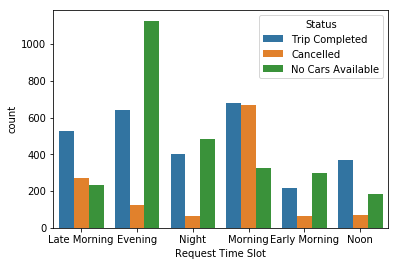

In [26]:
sns.countplot(x=uber['Request Time Slot'],hue=uber['Status'],data=uber)

"No car available" is mostly not found during evening and most car "Cancelled" is found in the  Morning

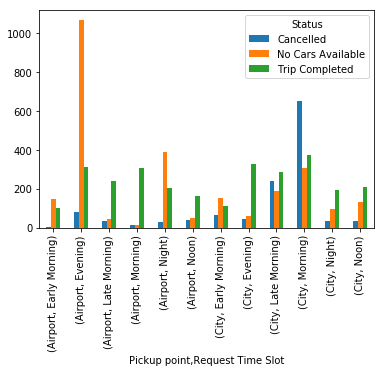

In [27]:
pickup_df = pd.DataFrame(uber.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

Most No Cars Available are in the Evening from Airport to City.
Most Cancelled trips are in the Morning from City to Airport. 

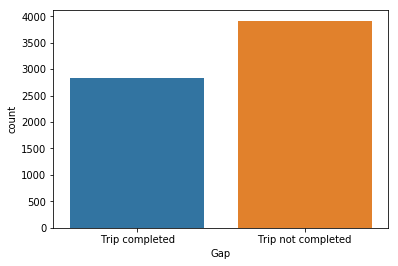

In [28]:
sns.countplot(x=uber['Gap'], data = uber)

more trips are not completed than completed

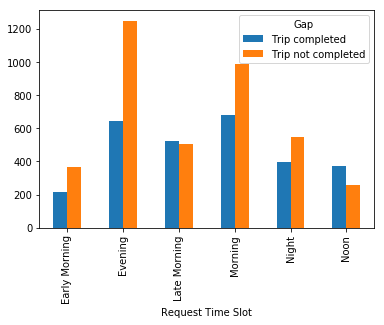

In [30]:
gap_timeslot_df = pd.DataFrame(uber.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

we can see that in evening trips are not complted are more


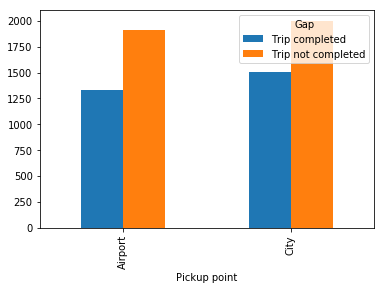

In [31]:
gap_pickup_df = pd.DataFrame(uber.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

Trip not completed are more from city

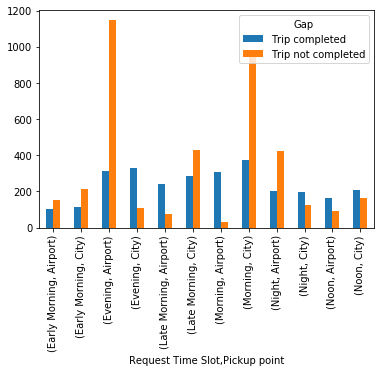

In [33]:
#Plot to count the number of requests that was completed and which was not, for the final analysis
gap_main_df = pd.DataFrame(uber.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

# Hypothesis

Pickup Point - City :
As per the analysis, the morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

Pickup Point - Airport :
Upon analysis, the evening time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.




# Conclusion


Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand: -

1.For reducingthe demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times .

2.Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.

3.Last solution to bring down the gap is to increase the numbers of cab in its fleet.